## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

# Time series prediction using LSTM

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [126]:
import pandas as pd
import numpy as np
d1=pd.read_csv("/content/daily-minimum-temperatures-in-me.csv",header=0, index_col=0)

### Print the data
- First 5 rows only

In [127]:
d1.head(5)

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [128]:
d1.shape

(3650, 1)

### Set index column
- Set the DataFrame index using "Date" column

In [ ]:
#Already did when loading the data

## Question 2

### Check the total count of null values in the data

In [129]:
d1.isna().count()

Temperature    3650
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [130]:
d1.dropna()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


## Question 3

### Describe your dataframe
- use describe() method

In [131]:
d1.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

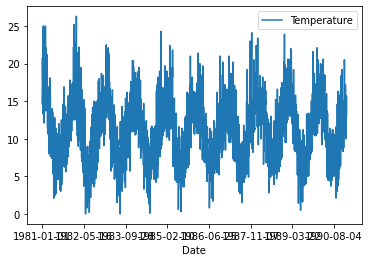

In [132]:
d1.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f899c331470>]],
      dtype=object)

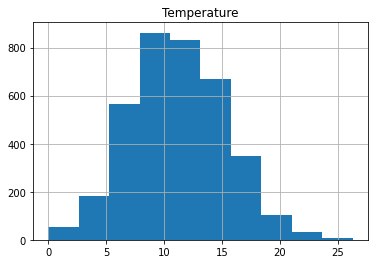

In [133]:
d1.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [134]:
d1.max()

Temperature    26.3
dtype: float64

In [135]:
d1.min()

Temperature    0.0
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [136]:
from sklearn.model_selection import train_test_split
y = d1['Temperature']
X=d1.drop('Temperature', axis=1)

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.25)

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [138]:

# Normalize time series data
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
# prepare data for normalization
values = d1.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
#inversed = scaler.inverse_transform(normalized)
#for i in range(5):
	#print(inversed[i])

Min: 0.000000, Max: 26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]


### Print scaled train and test data
- print only first 5 values

In [139]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print('X_test:', X_test)
print ("y_test: ", y_test)

X_train:  Index(['1989-12-08', '1981-10-25', '1982-12-03', '1983-06-10', '1982-01-28',
       '1989-11-22', '1985-09-12', '1990-10-06', '1984-09-13', '1982-07-12',
       ...
       '1989-12-01', '1988-03-26', '1985-11-09', '1981-09-23', '1989-12-14',
       '1986-09-12', '1984-06-10', '1990-04-11', '1981-12-10', '1987-02-21'],
      dtype='object', name='Date', length=2737)
y_train:  Date
1989-12-08    16.5
1981-10-25     8.4
1982-12-03    10.5
1983-06-10     7.8
1982-01-28    12.5
              ... 
1986-09-12     6.0
1984-06-10     5.0
1990-04-11    18.5
1981-12-10    13.5
1987-02-21    13.4
Name: Temperature, Length: 2737, dtype: float64
X_test: Index(['1982-12-24', '1988-03-25', '1987-10-28', '1989-05-18', '1990-10-18',
       '1990-05-07', '1989-03-13', '1982-06-16', '1989-07-20', '1989-05-24',
       ...
       '1984-06-28', '1984-10-12', '1986-03-26', '1983-04-08', '1989-03-15',
       '1990-12-12', '1981-01-23', '1990-03-20', '1987-07-09', '1990-02-14'],
      dtype='object', 

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [140]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [141]:
X_train =d1.[]
y_train =d1.[]
n_future =1 # next 4 days temperature forecast
n_past = 1 # Past 30 days 
for i in range(0,len(normalized)-n_past-n_future+1):
    X_train.append(normalized[i : i + n_past , 0])     
    y_train.append(normalized[i + n_past : i + n_past + n_future , 0 ])
X_train , y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], 1) )

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [ ]:
#done in the above step

### Print shape of data
- print shape of X_train and X_test

In [142]:
print ("X_train: ", X_train)
print('X_test:', X_test)

X_train:  [[[0.78707224]]

 [[0.68060837]]

 [[0.7148289 ]]

 ...

 [[0.51711027]]

 [[0.51330798]]

 [[0.59695817]]]
X_test: Index(['1982-12-24', '1988-03-25', '1987-10-28', '1989-05-18', '1990-10-18',
       '1990-05-07', '1989-03-13', '1982-06-16', '1989-07-20', '1989-05-24',
       ...
       '1984-06-28', '1984-10-12', '1986-03-26', '1983-04-08', '1989-03-15',
       '1990-12-12', '1981-01-23', '1990-03-20', '1987-07-09', '1990-02-14'],
      dtype='object', name='Date', length=913)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [146]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout

In [147]:
regressor = Sequential()
regressor.add((LSTM(units=10, return_sequences=True,stateful=True) ))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [150]:
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(X_train, y_train, epochs=25,batch_size=1 )

Epoch 1/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0214 - acc: 8.2214e-04
Epoch 2/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0113 - acc: 8.2214e-04
Epoch 3/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0108 - acc: 8.2214e-04
Epoch 4/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0107 - acc: 8.2214e-04
Epoch 5/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0105 - acc: 8.2214e-04
Epoch 6/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0105 - acc: 8.2214e-04
Epoch 7/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0104 - acc: 8.2214e-04
Epoch 8/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 8.2214e-04
Epoch 9/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 8.2214e-04
Epoch 10/25
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0103 - acc: 

### summarize your model
- use summary() method

In [151]:
regressor.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                multiple                  480       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [152]:
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(X_train, y_train, epochs=50,batch_size=1 )

Epoch 1/50
3649/3649 [==============================] - 4s 1ms/step - loss: 0.0100 - acc: 8.2214e-04
Epoch 2/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 8.2214e-04
Epoch 3/50
3649/3649 [==============================] - 4s 1ms/step - loss: 0.0101 - acc: 8.2214e-04
Epoch 4/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0101 - acc: 8.2214e-04
Epoch 5/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 8.2214e-04
Epoch 6/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0100 - acc: 8.2214e-04
Epoch 7/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 8.2214e-04
Epoch 8/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0101 - acc: 8.2214e-04
Epoch 9/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0101 - acc: 8.2214e-04
Epoch 10/50
3649/3649 [==============================] - 5s 1ms/step - loss: 0.0102 - acc: 

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE